In [8]:
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
import requests

def crawling(keyword, sort, s_date, e_date):
    # title_text = []
    s_from = s_date.replace(".", "")
    e_to = e_date.replace(".", "")
    page = 1
    maxpage_t =(int(10)-1)*10+1

    f = open("crl_result.txt", 'w', encoding='UTF8')

    while page <= maxpage_t:
        url = "https://search.naver.com/search.naver?where=news&query=" + keyword + "&sort=" + sort + "&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        response = requests.get(url)
        html = response.text
        
        # 뷰티풀소프의 인자값 지정
        soup = BeautifulSoup(html, 'html.parser')
        
        # 태그에서 제목과 링크주소 추출
        atags = soup.select('._sp_each_title')
        
        for atag in atags:
            # title_text.append(atag.text)  # 제목
            f.write(atag.text)

        page += 10\
    
    print('*** success crawling ***')
    f.close()


crawling('햄버거', '0', '2019.11.08', '2019.11.11')


*** success crawling ***


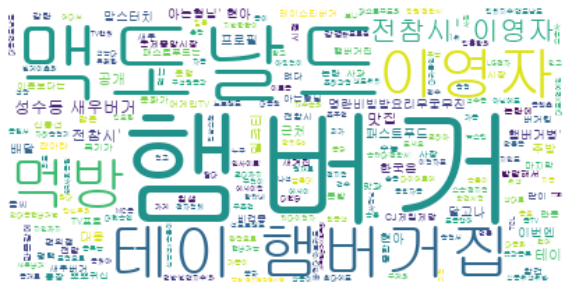

In [12]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

f = open("crl_result.txt", 'r', encoding='UTF8')

text = f.read()

# stopwords = set(STOPWORDS)
# stopwords.add("햄버거")


wordcloud = WordCloud(
                font_path='c:/windows/fonts/gulim.ttc', 
                background_color='white'
                # , stopwords=stopwords
                ).generate(text)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig('wordcloud.png')

f.close()

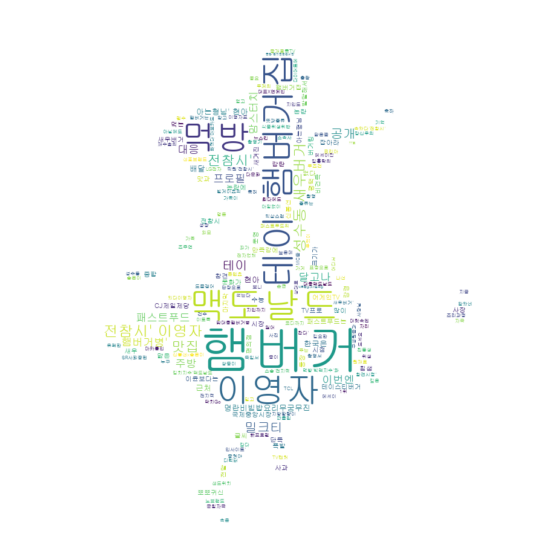

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

f = open("crl_result.txt", 'r', encoding='UTF8')
text = f.read()

alice_mask = np.array(Image.open("alice_mask.png"))

# stopwords = set(STOPWORDS)
# stopwords.add("햄버거")


wordcloud = WordCloud(
                font_path='c:/windows/fonts/gulim.ttc', 
                background_color='white'
                # , stopwords=stopwords
                , mask = alice_mask
                ).generate(text)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig('wordcloud.png')

f.close()